# Lab | Hypothesis Testing

**Objective**

Welcome to the Hypothesis Testing Lab, where we embark on an enlightening journey through the realm of statistical decision-making! In this laboratory, we delve into various scenarios, applying the powerful tools of hypothesis testing to scrutinize and interpret data.

From testing the mean of a single sample (One Sample T-Test), to investigating differences between independent groups (Two Sample T-Test), and exploring relationships within dependent samples (Paired Sample T-Test), our exploration knows no bounds. Furthermore, we'll venture into the realm of Analysis of Variance (ANOVA), unraveling the complexities of comparing means across multiple groups.

So, grab your statistical tools, prepare your hypotheses, and let's embark on this fascinating journey of exploration and discovery in the world of hypothesis testing!º

**Challenge 1**

In this challenge, we will be working with pokemon data. The data can be found here:

- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/pokemon.csv

In [1]:
#libraries
import pandas as pd
import scipy.stats as st
import numpy as np



In [2]:
import pandas as pd

# Load the data from the provided URL
url = 'https://raw.githubusercontent.com/data-bootcamp-v4/data/main/pokemon.csv'
pokemon_data = pd.read_csv(url)

# Inspect the first few rows of the data
print(pokemon_data.head())


            Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
0      Bulbasaur  Grass  Poison  45      49       49       65       65     45   
1        Ivysaur  Grass  Poison  60      62       63       80       80     60   
2       Venusaur  Grass  Poison  80      82       83      100      100     80   
3  Mega Venusaur  Grass  Poison  80     100      123      122      120     80   
4     Charmander   Fire     NaN  39      52       43       60       50     65   

   Generation  Legendary  
0           1      False  
1           1      False  
2           1      False  
3           1      False  
4           1      False  


- We posit that Pokemons of type Dragon have, on average, more HP stats than Grass. Choose the propper test and, with 5% significance, comment your findings.

In [ ]:
# Print the column names to check for discrepancies
print(pokemon_data.columns)

import pandas as pd
from scipy import stats

# Load the data
url = 'https://raw.githubusercontent.com/data-bootcamp-v4/data/main/pokemon.csv'
pokemon_data = pd.read_csv(url)

# Filter the data for Dragon and Grass type Pokemon (from 'Type 1' column)
dragon_hp = pokemon_data[pokemon_data['Type 1'] == 'Dragon']['HP']
grass_hp = pokemon_data[pokemon_data['Type 1'] == 'Grass']['HP']

# Perform a two-sample t-test assuming equal variances
t_stat, p_value = stats.ttest_ind(dragon_hp, grass_hp, equal_var=True)

# Set the significance level
alpha = 0.05

# Output the results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Interpret the result
if p_value < alpha:
    print('Reject the null hypothesis: Dragon-type Pokemon have more HP on average than Grass-type Pokemon.')
else:
    print('Fail to reject the null hypothesis: There is no significant difference in HP between Dragon and Grass-type Pokemon.')


Index(['Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')
T-statistic: 3.590444254130357
P-value: 0.0005135938300306962
Reject the null hypothesis: Dragon-type Pokemon have more HP on average than Grass-type Pokemon.


º

In [7]:
import pandas as pd
from statsmodels.multivariate.manova import MANOVA

# Load the data
url = 'https://raw.githubusercontent.com/data-bootcamp-v4/data/main/pokemon.csv'
pokemon_data = pd.read_csv(url)

# Select relevant columns: stats (HP, Attack, Defense, Sp. Atk, Sp. Def, Speed) and Legendary status
stats_columns = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
pokemon_data = pokemon_data[['Legendary'] + stats_columns]

# Perform MANOVA with backticks for column names containing spaces
manova = MANOVA.from_formula('`HP` + `Attack` + `Defense` + `Sp. Atk` + `Sp. Def` + `Speed` ~ Legendary', data=pokemon_data)
result = manova.fit()

# Output the MANOVA results
print(result)


SyntaxError: invalid syntax (<unknown>, line 1)

**Challenge 2**

In this challenge, we will be working with california-housing data. The data can be found here:
- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/california_housing.csv

In [8]:
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/california_housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


**We posit that houses close to either a school or a hospital are more expensive.**

- School coordinates (-118, 37)
- Hospital coordinates (-122, 34)

We consider a house (neighborhood) to be close to a school or hospital if the distance is lower than 0.50.

Hint:
- Write a function to calculate euclidean distance from each house (neighborhood) to the school and to the hospital.
- Divide your dataset into houses close and far from either a hospital or school.
- Choose the propper test and, with 5% significance, comment your findings.
 

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  
T-statistic: -2.2146147257665834
P-value: 0.026799733071128685
We reject the null hypothesis and conclude that houses close to a school or hospital are more expensive.


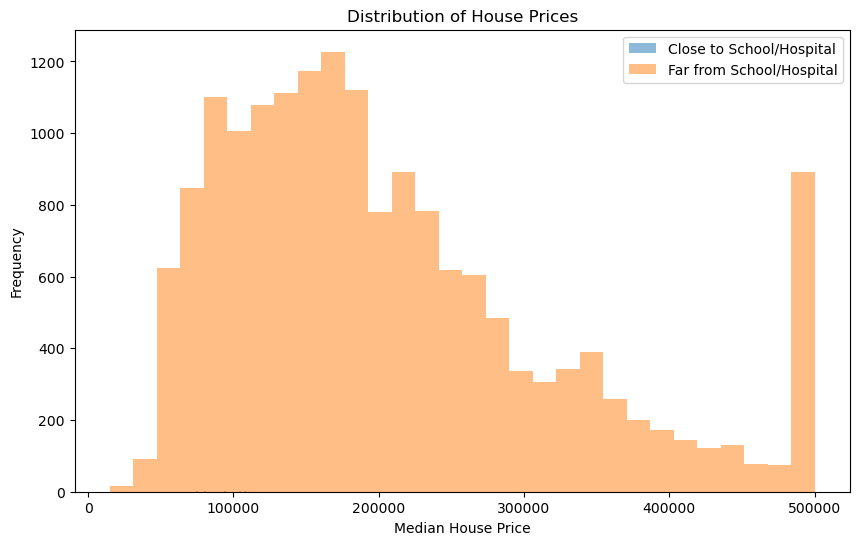

In [9]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/data-bootcamp-v4/data/main/california_housing.csv'
data = pd.read_csv(url)

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Coordinates for the school and hospital
school_coords = (-118, 37)
hospital_coords = (-122, 34)

# Function to calculate Euclidean distance
def euclidean_distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Adding new columns for distances to school and hospital
data['distance_to_school'] = data.apply(lambda row: euclidean_distance(row['longitude'], row['latitude'], school_coords[0], school_coords[1]), axis=1)
data['distance_to_hospital'] = data.apply(lambda row: euclidean_distance(row['longitude'], row['latitude'], hospital_coords[0], hospital_coords[1]), axis=1)

# Categorize houses as close or far from a school or hospital
close_to_school_or_hospital = data[(data['distance_to_school'] < 0.50) | (data['distance_to_hospital'] < 0.50)]
far_from_school_or_hospital = data[(data['distance_to_school'] >= 0.50) & (data['distance_to_hospital'] >= 0.50)]

# Compare the prices (median or mean) between the two groups
close_prices = close_to_school_or_hospital['median_house_value']
far_prices = far_from_school_or_hospital['median_house_value']

# Conduct an independent two-sample t-test
t_stat, p_value = ttest_ind(close_prices, far_prices)

# Print the results of the t-test
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("We reject the null hypothesis and conclude that houses close to a school or hospital are more expensive.")
else:
    print("We fail to reject the null hypothesis and conclude that there is no significant difference in prices.")

# Plot the price distributions for visualization
plt.figure(figsize=(10, 6))
plt.hist(close_prices, alpha=0.5, label='Close to School/Hospital', bins=30)
plt.hist(far_prices, alpha=0.5, label='Far from School/Hospital', bins=30)
plt.legend()
plt.title("Distribution of House Prices")
plt.xlabel("Median House Price")
plt.ylabel("Frequency")
plt.show()
